<center><h1>Digital Forensics</h1></center>
<center><h2>Project</h2></center>
<center><h3>Faked Speech Detection with Zero Knowledge</h3></center>
<center>Submitted by <b>Anand Prakash Saini</b></center>

Original Paper: https://arxiv.org/abs/2209.12573, 
Authors: Sahar Al Ajmi, Khizar Hayat, Alaa M. Al Obaidi, Naresh Kumar, Munaf Najmuldeen (University of Nizwa, Sultanate of Oman)

### Problem Statement:

In the era of rapid advancement of artificial intelligence and digital audio processing technologies has made the creation of faked or mimicked speech not only possible but also increasingly convincing. This development poses significant risks, ranging from personal identity theft to misinformation and security threats. Nowadays when digital communication predominates, the authenticity of audio content has become a critical concern.

### Introduction:
This research work introduces a neural network-based method to distinguish real from mimicked speech without relying on any reference or real source audio, termed as 'zero-knowledge' detection. 

It leverages a range of sophisticated audio feature extraction techniques, including spectral and cepstral analyses, to train a model capable of identifying faked speech with remarkable accuracy. 

The model's ability to operate in a blind mode, without the need for comparison against authentic audio, sets a new precedent in the field of digital audio forensics.

### Audio Processing Background:

**Audio Vs Speech**: Audio is a waveform data in which the amplitude changes with respect to time whereas Speech is the oral communication and pertains to the act of speaking and expressing thoughts and emotions by sounds and gestures.

An audio signal is a representation of sound in function to the vibration of sound that is audible to human ear (20Hz to 20kHz). For machines, the processing of audio is different from humans. In order for the machine to get a sound it should have the recorder and then save the sudio in machine processable formats like mp3, WMA,WAV etc.

**Tempral and Spectral features**:
Features from speech signals can be broadly classified as temporal and spectral features. The temporal features are time domain features having simple physical interpretation and easy to compute. 

- Examples are signal’s energy, maximum amplitude, zero crossing rate, minimum energy etc. 

The spectral features, on the other hand, are frequency-based features that are extracted after passing the time domain signal to the frequency domain using Fourier or other similar transforms. 

- Examples are frequency components, fundamental frequency, centroid, spectral flux, spectral density, roll-off etc. 

In the context of audio signals such features may be helpful in the identification of pitch, notes, rhythm and melody etc.

Spectrum and cepstrum are two important frequency-based concepts in audio processing:

- A **spectrum** is mathematically a Fourier transform of a signal which converts a time-domain signal into frequency domain, i.e. spectrum is the audio signal in frequency domain. 

- A **cepstrum** is the log of the magnitude of the spectrum followed by an inverse Fourier transform. That’s why its domain is neither frequency nor the time; its domain is called quefrency. Cepstrum can be said of as a sequence of numbers that characterize a frame of speech.

### The Dataset

The data is collected from a number of social media apps and sites and downloaded the audios which were then edited to conform to the proposed model by limiting it to a maximum duration of 20 seconds in WAV format.

One part of the dataset consists of all English audios (both real and mimicked). The second part of the dataset contains a mix of both English and Arabic audios. 

The audio files are named so that the first four characters are digits to represen the index and the fifth character is either ’r’ or ’f’ to label the voice as real or faked, respectively. the raw dataset is available for public on GitHub (https://github.com/SaSs7/Dataset).

Our goal is to blindly identify whether a given voice is mimicked or otherwise. Hence for our experiments, a set of independent real and faked audios was required to create the dataset; real and faked voices uttered independently of what is being said and who said it and independent of the language.

In [1]:
import IPython.display as ipd

# Play the audio file
print("Example Real Audio:")
ipd.Audio("0027r.wav")


Example Real Audio:


In [2]:
print("Example Fake Audio:")
ipd.Audio('0040f.wav')

Example Fake Audio:


### Methodology

The use case of this method concerns the scenario of a complete blindness wherein no prior or side information is available about the speaker. 

This work's emphasis is on classifying the speech, as faked, or otherwise, under the assumption that no other recorded voice of the speaker is available; whether genuine or disguised. T

he purported speaker is only represented once in the training data; that too either as real or mimicked, but not both. Potentially, this work's method may be very useful in improving efficiency of many audio processing methods, especially, when applied at the pre-processing stage.


<center><b>The Proposed Method</b></center>


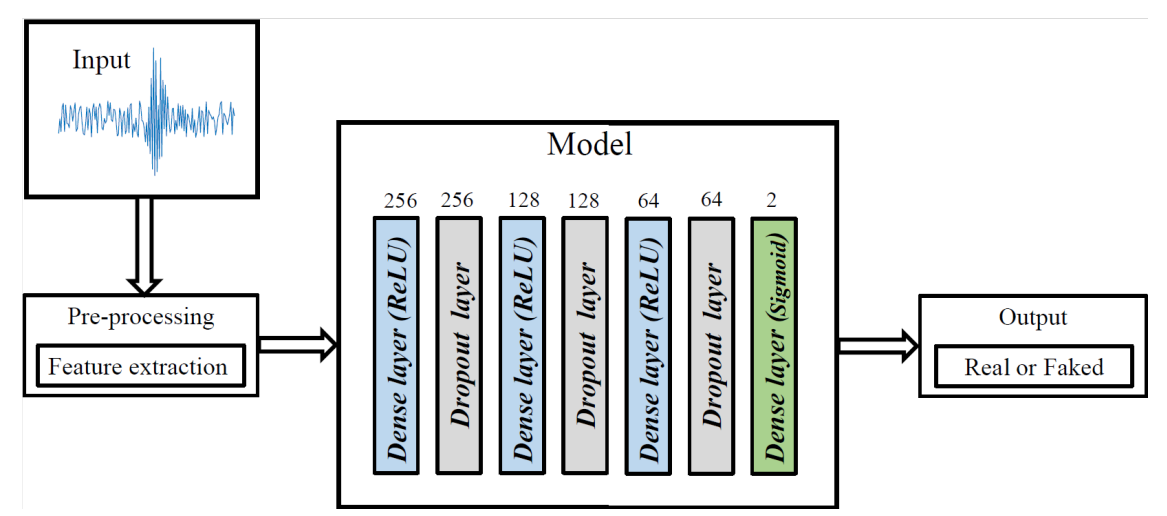

### Input

For the training set, it is essential that:

- Exactly one sample pertains to a purported speaker.

- Either the real or the faked voice of a given speaker is part of the dataset; in fact, they should be mutually exclusive.

- The spoken words are not required to be identical.

Keeping the above in view, We extracted our dataset from the raw dataset to contain 933 English-only audio samples and 1127 samples in both English and Arabic.

### Feature extraction

- **Zero crossing rate**: It indicates the number of times the value of the signal changes between positive and negative and vise versa. It is also used to measure the noise in a signal, and it usually gives high value in case of a noisy signal.

-  **Spectral centroid**: It is a feature based on frequency which indicates the location of the center of mass of the spectrum. In audios it is known as a good predictor of “ brightness” of a sound.

- **Spectral roll off**: This feature is used to differentiate between the harmonic sound (below roll off) and the noise sound (above roll off). It is known as the energy spectrum under a specific percentage that is defined by the used (85% by default).

- **Spectral bandwidth**: The difference between the higher and lower frequencies in a group of continuous frequencies.

- **Chroma**: This representation for audio where the spectrum is divided onto 12 bins representing the 12 distinct semitones (or chroma) of the musical octave.

- **Root Mean Square Energy (RMSE)**: RMSE represents the energy of the signal, and shows how loud the signal is.

- **Spectral flux**: It measures how quick the power spectrum of a signal is changing, and it is calculated by comparing the changes of the power spectrum between one frame and the frame before it.

- **Spectral density**: It is the measure of signal’s power content against frequency.

- **Cepstral Features**: These are, as stated above, quefrency domain features with the following being considered important:

    - **Mel Frequency Cepstral Coefficients (MFCCs)**: MFCCs are widely used features for speech recognition. The Mel-frequency scale represents subjective or perceived pitch as its construction is based on pairwise comparisons of sinusoidal tones. The conversion between Hertz (f) and Mel (m) frequencies can be generalized as:
    
    $$ \text{m} = 2595 . \log[1 + \frac{f}{700}],$$
    $$ f = 700.(10^{\frac{m}{2595}}-1)$$
    
    MFCCs are obtained by applying a short time Fourier transform to window-based slices from the audio signal, followed by calculating the power spectrum and consequently filter banks (triangular in shape). The filter bank coefficients are highly correlated and one way to de-correlate them is by applying a Discrete Cosine Transform DCT to get a compressed representation in the form of MFCC. Typically, MFCC 2-13 (i.e. 12 coefficients) are kept and the rest are discarded.

    - **Gammatone Frequency Cepstral Coefficients (GFCCs)**: used in a number of speech processing applications, such as speaker identification. A Gammatone filter bank approximates the impulse response of the auditory nerve fiber thus emulating human hearing and its shape can be likened to a Gamma function $(e^{ −2π(f_{c})bt})$ modulating the tone $(cos(2 \pi f_{c} t + \phi))$:
$$g(t) = at^{n-1}e^{2 \pi (f_{c}) b t} cos(2 \pi f_{c} t + \phi)$$

Where $a$ is peak value, $n$ the order of the filter, $b$ the bandwidth, $f_{c}$ the characteristic frequency and $\phi$ is initial phase. $f_{c}$ and $b$ can be derived from Equivalent Rectangular Bandwidth (ERB) scale, using the
following equation:
$$ \text{ERB}(f_{c}) = 24.7 \cdot (4.37 \cdot \frac{f_{c}}{1000} + 1) $$
$$ b = 1.019 \times \text{ERB}(f_{c})$$


### Preprocessing:
The data is standardized, which means that they will have a mean of 0 and a standard deviation of 1.

### The Neural Network:

Using sklearn.model_selection, the feature set is first partitioned to training and testing sets. During the training phase, the training set is dynamically partitioned to training and validation parts. 

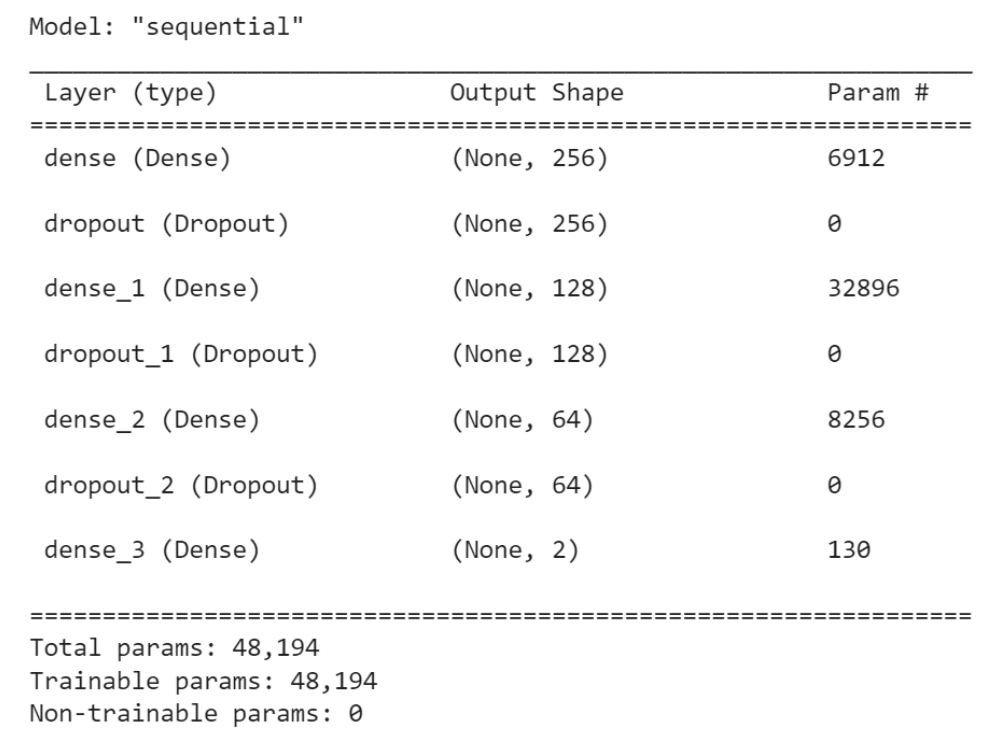

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import librosa
import csv
import os
import pandas as pd
import seaborn as sns
from keras import models
from keras import layers
from datetime import datetime
from keras import backend as K
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot

C:\Users\shash\Desktop\Environments\deeplearning_class\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


### All English Audios:

In [4]:
'''The following function is to extract the features and store them in the csv file, this function is tested on the 
dataset but for the rest of the experiment we will use the pre stored csv files to save time and the uniformity
'''
def extractWavFeatures(soundFilesFolder, csvFileName):
    print("The features of the files in the folder "+soundFilesFolder+" will be saved to "+csvFileName)
    header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
    for i in range(1, 21):
        header += f' mfcc{i}'
    header += ' label'
    header = header.split()
    print('CSV Header: ', header)
    file = open(csvFileName, 'w', newline='')
    #with file:
    writer = csv.writer(file)
    writer.writerow(header)
    genres = 'real fake'.split()
    for filename in os.listdir(soundFilesFolder):
        number = f'{soundFilesFolder}/{filename}'
        y, sr = librosa.load(number, mono=True, duration=3)
        # remove leading and trailing silence
        y, index = librosa.effects.trim(y)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rmse = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        writer.writerow(to_append.split())
    file.close()
    print("End of extractWavFeatures")

    # Defines the names of the CSV files
TRAIN_CSV_FILE = "train_E.csv"
TEST_CSV_FILE = "test_E.csv"

def preProcessData(csvFileName):
    print(csvFileName+ " will be preprocessed")
    data = pd.read_csv(csvFileName)
    filenameArray = data['filename'] 
    soundArray = []
    
    for i in range(len(filenameArray)):
        sound = filenameArray[i][4]
        if sound == "f":
            sound = "0"
        else: 
            sound = "1"
        soundArray.append(sound)
    data['fake(0)/real(1)'] = soundArray
    
    #Dropping unnecessary columns
    data = data.drop(['filename'],axis=1)
    data = data.drop(['label'],axis=1)
    data = data.drop(['chroma_stft'],axis=1)
    data.shape

    print("Preprocessing is finished")
    print(data)
    return data

trainData = preProcessData(TRAIN_CSV_FILE)
testData = preProcessData(TEST_CSV_FILE) 
# Splitting the dataset into training, validation and testing dataset
from sklearn.model_selection import train_test_split
X = np.array(trainData.iloc[:, :-1], dtype=float)
y = np.array(trainData.iloc[:, -1], dtype=float)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=4)
#print(y)

X_test = np.array(testData.iloc[:, :-1], dtype=float)
y_test = np.array(testData.iloc[:, -1], dtype=float)
print("Y from training data:", y_train.shape)
print("Y from validation data:", y_val.shape)
print("Y from test data:", y_test.shape)  

#Normalizing the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform( X_train )
X_val = scaler.transform( X_val )
X_test = scaler.transform( X_test )
print("X from training data", X_train.shape)
print("X from validation data", X_val.shape)
print("X from test data", X_test.shape)

train_E.csv will be preprocessed
Preprocessing is finished
          rmse  spectral_centroid  spectral_bandwidth      rolloff  \
0     0.034180        1668.499512         1931.042986  3549.831355   
1     0.021000        2285.333847         2078.051071  4437.413424   
2     0.050395        2520.792678         2095.533805  4588.145846   
3     0.033419        1244.333072         1363.402056  2314.322416   
4     0.155624         610.774970         1354.636615  1060.675894   
...        ...                ...                 ...          ...   
1721  0.048439        2388.029478         2371.731559  4676.266339   
1722  0.021571        1974.492901         1784.187394  4006.086801   
1723  0.026254        2469.095902         2081.365811  4407.598220   
1724  0.086118        2466.251183         1995.966252  4459.277907   
1725  0.015375        2224.121561         2600.205771  5107.592961   

      zero_crossing_rate       mfcc1       mfcc2      mfcc3      mfcc4  \
0               0.075883 -

In [5]:
#Creating a Model
# model 1
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))

# Learning Process of a model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               6656      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0

In [6]:
# Calculate pre-training accuracy 
score = model.evaluate(X_test, y_test, verbose=1)
accuracy = 100*score[1]
print("Pre-training accuracy: %.4f%%" % accuracy) 

5/5 [==============================] - 1s 5ms/step - loss: 0.7151 - accuracy: 0.5075
Pre-training accuracy: 50.7463%


In [7]:
start = datetime.now()
#training
history = model.fit(X_train,
                    y_train,
                    validation_split=(0.1),
                    epochs=135,
                    batch_size=128)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/135
10/10 [==============================] - 1s 17ms/step - loss: 0.7516 - accuracy: 0.5902 - val_loss: 0.3835 - val_accuracy: 0.9348
Epoch 2/135
10/10 [==============================] - 0s 12ms/step - loss: 0.4981 - accuracy: 0.7544 - val_loss: 0.2365 - val_accuracy: 0.9420
Epoch 3/135
10/10 [==============================] - 0s 11ms/step - loss: 0.3563 - accuracy: 0.8486 - val_loss: 0.1714 - val_accuracy: 0.9348
Epoch 4/135
10/10 [==============================] - 0s 11ms/step - loss: 0.2800 - accuracy: 0.8857 - val_loss: 0.1505 - val_accuracy: 0.9348
Epoch 5/135
10/10 [==============================] - 0s 13ms/step - loss: 0.2623 - accuracy: 0.9090 - val_loss: 0.1420 - val_accuracy: 0.9420
Epoch 6/135
10/10 [==============================] - 0s 14ms/step - loss: 0.2383 - accuracy: 0.9130 - val_loss: 0.1367 - val_accuracy: 0.9420
Epoch 7/135
10/10 [==============================] - 0s 11ms/step - loss: 0.2091 - accuracy: 0.9130 - val_loss: 0.1329 - val_accuracy: 0.9420
Epoch 

10/10 [==============================] - 0s 12ms/step - loss: 0.0525 - accuracy: 0.9823 - val_loss: 0.0796 - val_accuracy: 0.9783
Epoch 59/135
10/10 [==============================] - 0s 11ms/step - loss: 0.0520 - accuracy: 0.9823 - val_loss: 0.0777 - val_accuracy: 0.9783
Epoch 60/135
10/10 [==============================] - 0s 12ms/step - loss: 0.0450 - accuracy: 0.9823 - val_loss: 0.0809 - val_accuracy: 0.9710
Epoch 61/135
10/10 [==============================] - 0s 12ms/step - loss: 0.0500 - accuracy: 0.9799 - val_loss: 0.0844 - val_accuracy: 0.9710
Epoch 62/135
10/10 [==============================] - 0s 12ms/step - loss: 0.0480 - accuracy: 0.9815 - val_loss: 0.0813 - val_accuracy: 0.9710
Epoch 63/135
10/10 [==============================] - 0s 13ms/step - loss: 0.0581 - accuracy: 0.9783 - val_loss: 0.0805 - val_accuracy: 0.9710
Epoch 64/135
10/10 [==============================] - 0s 15ms/step - loss: 0.0529 - accuracy: 0.9815 - val_loss: 0.0792 - val_accuracy: 0.9783
Epoch 65/135

10/10 [==============================] - 0s 10ms/step - loss: 0.0132 - accuracy: 0.9984 - val_loss: 0.1288 - val_accuracy: 0.9638
Epoch 116/135
10/10 [==============================] - 0s 10ms/step - loss: 0.0169 - accuracy: 0.9960 - val_loss: 0.1295 - val_accuracy: 0.9638
Epoch 117/135
10/10 [==============================] - 0s 9ms/step - loss: 0.0245 - accuracy: 0.9936 - val_loss: 0.1324 - val_accuracy: 0.9565
Epoch 118/135
10/10 [==============================] - 0s 9ms/step - loss: 0.0112 - accuracy: 0.9976 - val_loss: 0.1379 - val_accuracy: 0.9638
Epoch 119/135
10/10 [==============================] - 0s 9ms/step - loss: 0.0132 - accuracy: 0.9968 - val_loss: 0.1450 - val_accuracy: 0.9565
Epoch 120/135
10/10 [==============================] - 0s 8ms/step - loss: 0.0119 - accuracy: 0.9952 - val_loss: 0.1601 - val_accuracy: 0.9565
Epoch 121/135
10/10 [==============================] - 0s 8ms/step - loss: 0.0114 - accuracy: 0.9960 - val_loss: 0.1712 - val_accuracy: 0.9565
Epoch 122/1

In [8]:
score = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.9963768124580383
Testing Accuracy:  0.9328358173370361


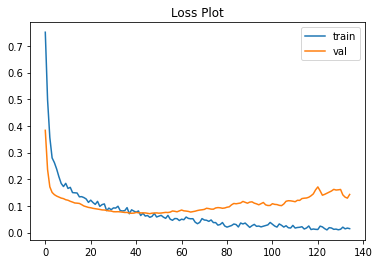

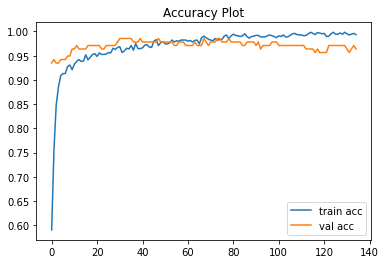

<Figure size 432x288 with 0 Axes>

In [9]:
# plot training history
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.title('Loss Plot')
pyplot.show()

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
pyplot.title('Accuracy Plot')
plt.show()
plt.savefig('AccVal_acc')

Classification Report for Test Data



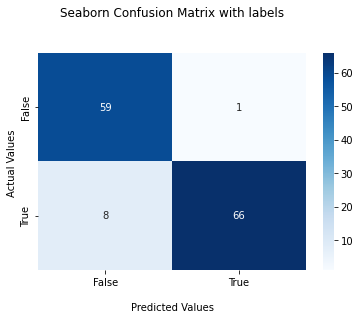


Classification Report
              precision    recall  f1-score   support

           0       0.88      0.98      0.93        60
           1       0.99      0.89      0.94        74

    accuracy                           0.93       134
   macro avg       0.93      0.94      0.93       134
weighted avg       0.94      0.93      0.93       134



In [10]:
def report(X_data, y_data):
    #Confution Matrix and Classification Report
    Y_pred = np.argmax(model.predict(X_data), axis=-1)
    y_test_num = y_data.astype(np.int64)
    conf_mt = confusion_matrix(y_test_num, Y_pred)
    ax = sns.heatmap(conf_mt, annot=True, cmap='Blues')

    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
    plt.show()
    print('\nClassification Report')
    target_names = ["real", "fake"]
    print(classification_report(y_test_num, Y_pred))

print("Classification Report for Test Data\n")
report(X_test, y_test)

### Evaluation of English only model on arabic only audios

In [11]:
#extractWavFeatures("data/arabic_only", 'arabic_only.csv')

In [12]:
arabic_only_data = preProcessData('arabic_only.csv')
X_arabic_only = np.array(arabic_only_data.iloc[:, :-1], dtype=float)
y_arabic_only = np.array(arabic_only_data.iloc[:, -1], dtype=float)
score = model.evaluate(X_arabic_only, y_arabic_only, verbose=0)
print("English model performance Accuracy on arabic audios: ", score[1])

arabic_only.csv will be preprocessed
Preprocessing is finished
         rmse  spectral_centroid  spectral_bandwidth      rolloff  \
0    0.378636        1775.428684         1859.840679  3144.178936   
1    0.282145        2252.033896         2170.612940  4277.239521   
2    0.305489        1971.192996         2014.879602  3641.016921   
3    0.316786        1900.684679         1970.851634  3573.896484   
4    0.309140        1925.626976         2011.648934  3615.010705   
..        ...                ...                 ...          ...   
361  0.032539        1228.649694         1107.885710  2154.582024   
362  0.037689        1370.739366         1092.851283  2370.971304   
363  0.025142        1536.837631         1684.140324  3028.976300   
364  0.030934        1612.977296         1453.964337  3025.746319   
365  0.040843        1421.645269         1236.050288  2706.392353   

     zero_crossing_rate       mfcc1       mfcc2      mfcc3      mfcc4  \
0              0.095944   24.454071

### Mixed - English and Arabic

In [13]:
TRAIN_CSV_FILE_MIX = "train_mix.csv"
TEST_CSV_FILE_MIX = "test_mix.csv"

trainData_MIX = preProcessData(TRAIN_CSV_FILE_MIX)
testData_MIX = preProcessData(TEST_CSV_FILE_MIX) 

# Splitting the dataset into training, validation and testing dataset
from sklearn.model_selection import train_test_split
X_mix = np.array(trainData_MIX.iloc[:, :-1], dtype=float)
y_mix = np.array(trainData_MIX.iloc[:, -1], dtype=float)
X_train_mix, X_val_mix, y_train_mix, y_val_mix = train_test_split(X, y, test_size=0.2, random_state=4)
#print(y)

X_test_mix = np.array(testData_MIX.iloc[:, :-1], dtype=float)
y_test_mix = np.array(testData_MIX.iloc[:, -1], dtype=float)
print("Y from training data:", y_train_mix.shape)
print("Y from validation data:", y_val_mix.shape)
print("Y from test data:", y_test_mix.shape) 

#Normalizing the dataset
scaler = StandardScaler()
X_train_mix = scaler.fit_transform( X_train_mix )
X_val_mix = scaler.transform( X_val_mix )
X_test_mix = scaler.transform( X_test_mix )

train_mix.csv will be preprocessed
Preprocessing is finished
          rmse  spectral_centroid  spectral_bandwidth      rolloff  \
0     0.026089        1631.391348         2048.803882  3303.773099   
1     0.149174        2297.421531         2779.812643  5302.799730   
2     0.021376        2843.856763         2058.380855  5410.962665   
3     0.036125        2205.408168         2143.451236  4195.496169   
4     0.017126        3002.692762         2708.508928  5999.812951   
...        ...                ...                 ...          ...   
1827  0.150160        2662.907157         1943.178048  4488.513371   
1828  0.022921        1720.046679         2240.861763  3635.053148   
1829  0.060629        1780.883235         1660.125177  3164.552659   
1830  0.024021        1893.898462         1850.908678  3928.318810   
1831  0.061028        3303.279910         2685.840721  6441.574895   

      zero_crossing_rate       mfcc1       mfcc2      mfcc3      mfcc4  \
0               0.055897

In [14]:
#Creating a Model
# model
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train_mix.shape[1],)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))

# Learning Process of a model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# Calculate pre-training accuracy 
score = model.evaluate(X_test_mix, y_test_mix, verbose=1)
accuracy = 100*score[1]
print("Pre-training accuracy: %.4f%%" % accuracy) 

6/6 [==============================] - 0s 3ms/step - loss: 0.7087 - accuracy: 0.5260
Pre-training accuracy: 52.6042%


In [16]:
start = datetime.now()
#training
history = model.fit(X_train_mix,
                    y_train_mix,
                    validation_split=(0.1),
                    epochs=135,
                    batch_size=128)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/135
10/10 [==============================] - 1s 25ms/step - loss: 0.7493 - accuracy: 0.5757 - val_loss: 0.4768 - val_accuracy: 0.9130
Epoch 2/135
10/10 [==============================] - 0s 8ms/step - loss: 0.5446 - accuracy: 0.7367 - val_loss: 0.3229 - val_accuracy: 0.9275
Epoch 3/135
10/10 [==============================] - 0s 7ms/step - loss: 0.3898 - accuracy: 0.8438 - val_loss: 0.2156 - val_accuracy: 0.9420
Epoch 4/135
10/10 [==============================] - 0s 9ms/step - loss: 0.2770 - accuracy: 0.8808 - val_loss: 0.1680 - val_accuracy: 0.9420
Epoch 5/135
10/10 [==============================] - 0s 9ms/step - loss: 0.2708 - accuracy: 0.8969 - val_loss: 0.1535 - val_accuracy: 0.9420
Epoch 6/135
10/10 [==============================] - 0s 9ms/step - loss: 0.2554 - accuracy: 0.9034 - val_loss: 0.1465 - val_accuracy: 0.9420
Epoch 7/135
10/10 [==============================] - 0s 10ms/step - loss: 0.2108 - accuracy: 0.9211 - val_loss: 0.1409 - val_accuracy: 0.9420
Epoch 8/135

10/10 [==============================] - 0s 9ms/step - loss: 0.0490 - accuracy: 0.9823 - val_loss: 0.0588 - val_accuracy: 0.9783
Epoch 59/135
10/10 [==============================] - 0s 8ms/step - loss: 0.0436 - accuracy: 0.9855 - val_loss: 0.0608 - val_accuracy: 0.9783
Epoch 60/135
10/10 [==============================] - 0s 8ms/step - loss: 0.0427 - accuracy: 0.9879 - val_loss: 0.0627 - val_accuracy: 0.9783
Epoch 61/135
10/10 [==============================] - 0s 10ms/step - loss: 0.0331 - accuracy: 0.9911 - val_loss: 0.0615 - val_accuracy: 0.9783
Epoch 62/135
10/10 [==============================] - 0s 11ms/step - loss: 0.0402 - accuracy: 0.9847 - val_loss: 0.0603 - val_accuracy: 0.9855
Epoch 63/135
10/10 [==============================] - 0s 8ms/step - loss: 0.0431 - accuracy: 0.9807 - val_loss: 0.0603 - val_accuracy: 0.9783
Epoch 64/135
10/10 [==============================] - 0s 7ms/step - loss: 0.0384 - accuracy: 0.9879 - val_loss: 0.0593 - val_accuracy: 0.9783
Epoch 65/135
10/1

10/10 [==============================] - 0s 8ms/step - loss: 0.0152 - accuracy: 0.9952 - val_loss: 0.1040 - val_accuracy: 0.9783
Epoch 116/135
10/10 [==============================] - 0s 9ms/step - loss: 0.0140 - accuracy: 0.9968 - val_loss: 0.1076 - val_accuracy: 0.9783
Epoch 117/135
10/10 [==============================] - 0s 8ms/step - loss: 0.0190 - accuracy: 0.9936 - val_loss: 0.1167 - val_accuracy: 0.9710
Epoch 118/135
10/10 [==============================] - 0s 10ms/step - loss: 0.0262 - accuracy: 0.9936 - val_loss: 0.1108 - val_accuracy: 0.9783
Epoch 119/135
10/10 [==============================] - 0s 9ms/step - loss: 0.0137 - accuracy: 0.9944 - val_loss: 0.1110 - val_accuracy: 0.9710
Epoch 120/135
10/10 [==============================] - 0s 9ms/step - loss: 0.0120 - accuracy: 0.9960 - val_loss: 0.1112 - val_accuracy: 0.9710
Epoch 121/135
10/10 [==============================] - 0s 8ms/step - loss: 0.0090 - accuracy: 0.9976 - val_loss: 0.1107 - val_accuracy: 0.9710
Epoch 122/13

In [17]:
score = model.evaluate(X_train_mix, y_train_mix, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(X_test_mix, y_test_mix, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.997826099395752
Testing Accuracy:  0.796875


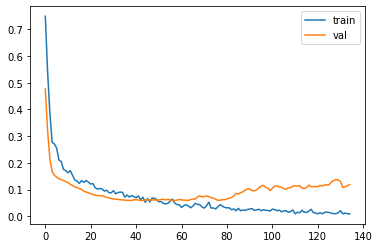

In [18]:
# plot training history
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

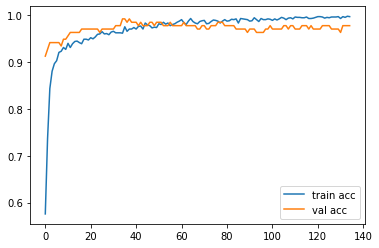

<Figure size 432x288 with 0 Axes>

In [19]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

Classification Report for Test Data



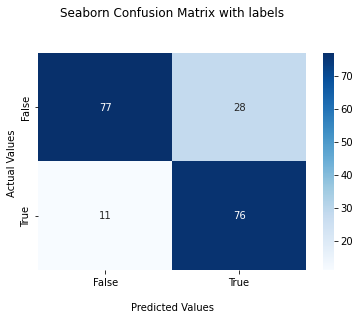


Classification Report
              precision    recall  f1-score   support

           0       0.88      0.73      0.80       105
           1       0.73      0.87      0.80        87

    accuracy                           0.80       192
   macro avg       0.80      0.80      0.80       192
weighted avg       0.81      0.80      0.80       192



In [20]:
print("Classification Report for Test Data\n")
report(X_test_mix, y_test_mix)

### Further Experiment

#### CNN Model:

CNNs are highly effective in capturing local patterns in data. In the context of audio feature analysis, they can efficiently recognize patterns in spectral features and MFCCs, which are critical for distinguishing real from faked speech.


In [21]:
def create_cnn_model(input_shape):
    model = models.Sequential()

    # Convolutional layers
    model.add(layers.Conv1D(64, 5, activation='relu', input_shape=(input_shape, 1)))
    model.add(layers.MaxPooling1D(3))
    model.add(layers.Conv1D(64, 5, activation='relu'))
    model.add(layers.MaxPooling1D(3))

    # Flattening the outputs for the dense layers
    model.add(layers.Flatten())

    # Dense layers
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))

    # Output layer
    model.add(layers.Dense(2, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model


In [22]:
from tensorflow.keras.utils import to_categorical

y_train_mix = to_categorical(y_train_mix, num_classes=2)
y_test_mix = to_categorical(y_test_mix, num_classes=2)
input_shape = X_train_mix.shape[1]
cnn_model  = create_cnn_model(input_shape)
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 21, 64)            384       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 7, 64)            0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 3, 64)             20544     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 256)              

In [23]:
# Calculate pre-training accuracy 
score = cnn_model.evaluate(X_test_mix, y_test_mix, verbose=1)
accuracy = 100*score[1]
print("Pre-training accuracy: %.4f%%" % accuracy) 

6/6 [==============================] - 0s 3ms/step - loss: 0.6994 - accuracy: 0.3906
Pre-training accuracy: 39.0625%


In [24]:
start = datetime.now()
#training
history = cnn_model.fit(X_train_mix,
                    y_train_mix,
                    validation_split=(0.1),
                    epochs=60,
                    batch_size=128)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/60
10/10 [==============================] - 1s 38ms/step - loss: 0.6815 - accuracy: 0.5515 - val_loss: 0.6301 - val_accuracy: 0.7246
Epoch 2/60
10/10 [==============================] - 0s 12ms/step - loss: 0.6023 - accuracy: 0.6892 - val_loss: 0.5256 - val_accuracy: 0.7609
Epoch 3/60
10/10 [==============================] - 0s 13ms/step - loss: 0.5293 - accuracy: 0.7528 - val_loss: 0.4382 - val_accuracy: 0.8043
Epoch 4/60
10/10 [==============================] - 0s 12ms/step - loss: 0.4509 - accuracy: 0.8060 - val_loss: 0.3716 - val_accuracy: 0.8551
Epoch 5/60
10/10 [==============================] - 0s 13ms/step - loss: 0.3913 - accuracy: 0.8333 - val_loss: 0.3019 - val_accuracy: 0.8913
Epoch 6/60
10/10 [==============================] - 0s 13ms/step - loss: 0.3031 - accuracy: 0.8889 - val_loss: 0.2464 - val_accuracy: 0.9058
Epoch 7/60
10/10 [==============================] - 0s 13ms/step - loss: 0.2509 - accuracy: 0.9066 - val_loss: 0.2245 - val_accuracy: 0.8913
Epoch 8/60
10

Epoch 59/60
10/10 [==============================] - 0s 17ms/step - loss: 0.0021 - accuracy: 0.9992 - val_loss: 0.2911 - val_accuracy: 0.9710
Epoch 60/60
10/10 [==============================] - 0s 22ms/step - loss: 0.0022 - accuracy: 0.9984 - val_loss: 0.1333 - val_accuracy: 0.9710
Training completed in time:  0:00:10.208697


In [25]:
score = cnn_model.evaluate(X_train_mix, y_train_mix, verbose=0)
print("Training Accuracy: ", score[1])

score = cnn_model.evaluate(X_test_mix, y_test_mix, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.9963768124580383
Testing Accuracy:  0.8229166865348816


### To Avoid Overfitting:

- Increased Dropout Rate: The dropout rate has been increased to 0.6 after each convolutional and dense layer.

- L2 Regularization: Added L2 regularization to convolutional and dense layers, which penalizes large weights.

- Early Stopping: An early stopping callback is set to monitor validation loss and will stop training if the loss does not decrease for 5 consecutive epochs.

In [26]:
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.callbacks import EarlyStopping

def create_improved_cnn_model(input_shape):
    model = models.Sequential()

    # Convolutional layers with increased dropout and L2 regularization
    model.add(layers.Conv1D(64, 5, activation='relu', input_shape=(input_shape, 1),
                            kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.MaxPooling1D(3))
    model.add(layers.Dropout(0.6))
    model.add(layers.Conv1D(64, 5, activation='relu', 
                            kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.MaxPooling1D(3))
    model.add(layers.Dropout(0.6))

    # Flattening the outputs for the dense layers
    model.add(layers.Flatten())

    # Dense layers with increased dropout
    model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.6))
    model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.6))
    model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.6))

    # Output layer
    model.add(layers.Dense(2, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Early Stopping Criterion
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

input_shape = X_train_mix.shape[1]
imp_cnn_model = create_improved_cnn_model(input_shape)
imp_cnn_model.summary()

# Calculate pre-training accuracy 
score = imp_cnn_model.evaluate(X_test_mix, y_test_mix, verbose=1)
accuracy = 100*score[1]
print("Pre-training accuracy: %.4f%%" % accuracy) 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 21, 64)            384       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 7, 64)            0         
 1D)                                                             
                                                                 
 dropout_11 (Dropout)        (None, 7, 64)             0         
                                                                 
 conv1d_3 (Conv1D)           (None, 3, 64)             20544     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 1, 64)            

In [27]:
# To train the model, use:
imp_cnn_model.fit(X_train_mix, y_train_mix, epochs=60, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/60
35/35 [==============================] - 1s 17ms/step - loss: 1.1493 - accuracy: 0.4891 - val_loss: 1.0939 - val_accuracy: 0.4710
Epoch 2/60
35/35 [==============================] - 0s 8ms/step - loss: 1.0878 - accuracy: 0.5199 - val_loss: 1.0703 - val_accuracy: 0.4855
Epoch 3/60
35/35 [==============================] - 0s 8ms/step - loss: 1.0606 - accuracy: 0.5489 - val_loss: 1.0458 - val_accuracy: 0.6051
Epoch 4/60
35/35 [==============================] - 0s 8ms/step - loss: 1.0244 - accuracy: 0.5507 - val_loss: 0.9960 - val_accuracy: 0.7319
Epoch 5/60
35/35 [==============================] - 0s 8ms/step - loss: 0.9679 - accuracy: 0.6486 - val_loss: 0.9247 - val_accuracy: 0.7283
Epoch 6/60
35/35 [==============================] - 0s 8ms/step - loss: 0.9147 - accuracy: 0.7101 - val_loss: 0.8823 - val_accuracy: 0.7065
Epoch 7/60
35/35 [==============================] - 0s 8ms/step - loss: 0.8746 - accuracy: 0.7156 - val_loss: 0.8691 - val_accuracy: 0.6920
Epoch 8/60
35/35 [=

35/35 [==============================] - 0s 8ms/step - loss: 0.3533 - accuracy: 0.8940 - val_loss: 0.2633 - val_accuracy: 0.9457
Epoch 60/60
35/35 [==============================] - 0s 8ms/step - loss: 0.3433 - accuracy: 0.9067 - val_loss: 0.2568 - val_accuracy: 0.9493


In [28]:
score = imp_cnn_model.evaluate(X_train_mix, y_train_mix, verbose=0)
print("Training Accuracy: ", score[1])

score = imp_cnn_model.evaluate(X_test_mix, y_test_mix, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.960869550704956
Testing Accuracy:  0.7708333134651184


### Conclusion

- The system can classify a given speech as faked or otherwise on the fly given no information about the speaker. 

- we were able to deduce that the nature of spoken language may be important as we got less that 60% accuracy in classifying via a network trained by English-only samples. 

- Accuracy improved  when the network was trained on mix data, Arabic constituted approximate 18 − −20% of the dataset. The performance of our model is proven by its accuracy which was at least 94%. 

- Further attempts were made to improve the performance by using more sophisticated networks such as CNN.

- Dropout, regularization and early stopping techniques were applied to reduce overfitting.